In [1]:
#Import Libraries
import sys
import os
import pandas as pd
from datetime import datetime

In [2]:
# Add the '../scripts' directory to the Python module search path.
# This allows us to import modules from that directory, 
# facilitating better organization of our code and access to shared scripts.
sys.path.append(os.path.abspath('../scripts'))

In [3]:
# Import the modules
import data_processing as dp
import model as md


In [4]:

df=pd.read_csv('../data/cleanedDataset.csv')
df.head(2)

C:\Users\asmam\AppData\Local\Temp\ipykernel_11556\4078464814.py:1: DtypeWarning: Columns (36) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('../data/cleanedDataset.csv')


,UnderwrittenCoverID,PolicyID,PostalCode,mmcode,RegistrationYear,Cylinders,cubiccapacity,kilowatts,NumberOfDoors,CustomValueEstimate,...,CrossBorder,TermFrequency,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType
0,120087,10173,1619,54057250.0,2004,4.0,1870.0,75.0,5.0,52700.0,...,Unknown,Monthly,No excess,Signage and Vehicle Wraps,Signage and Vehicle Wraps,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant
1,120087,10173,1619,54057250.0,2004,4.0,1870.0,75.0,5.0,52700.0,...,Unknown,Monthly,No excess,Signage and Vehicle Wraps,Signage and Vehicle Wraps,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant


In [5]:
# Check missing values in each column
missing_counts = df.isnull().sum()

# Print columns with more than 1 missing value
columns_with_missing = missing_counts[missing_counts > 1].index
# print(f'Columns with more than 1 missing value:\n{columns_with_missing}')

# Drop these columns
df = df.drop(columns=columns_with_missing)

In [6]:
df.head()

,UnderwrittenCoverID,PolicyID,PostalCode,mmcode,RegistrationYear,Cylinders,cubiccapacity,kilowatts,NumberOfDoors,CustomValueEstimate,...,CrossBorder,TermFrequency,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType
0,120087,10173,1619,54057250.0,2004,4.0,1870.0,75.0,5.0,52700.0,...,Unknown,Monthly,No excess,Signage and Vehicle Wraps,Signage and Vehicle Wraps,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant
1,120087,10173,1619,54057250.0,2004,4.0,1870.0,75.0,5.0,52700.0,...,Unknown,Monthly,No excess,Signage and Vehicle Wraps,Signage and Vehicle Wraps,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant
2,120087,10173,1619,54057250.0,2004,4.0,1870.0,75.0,5.0,52700.0,...,Unknown,Monthly,No excess,Signage and Vehicle Wraps,Signage and Vehicle Wraps,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant
3,120087,10173,1619,54057250.0,2004,4.0,1870.0,75.0,5.0,52700.0,...,Unknown,Monthly,No excess,Signage and Vehicle Wraps,Signage and Vehicle Wraps,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant
4,120087,10173,1619,54057250.0,2004,4.0,1870.0,75.0,5.0,52700.0,...,Unknown,Monthly,No excess,Signage and Vehicle Wraps,Signage and Vehicle Wraps,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant


In [7]:

# for col in df.columns:
#     unique_values = df[col].nunique()
#     if unique_values==1:
#         unique_values_lists = df[col].unique()
#         print(f"Unique values in {col}-->{unique_values}-->: {unique_values_lists}\n")


####  Unique Categories:

In [8]:
# Get categorical columns
categorical_columns = df.select_dtypes(include='object').columns
dp.column_detail(df,categorical_columns)

,Column,DataType,NumUniqueValues
0,Citizenship,object,4
1,LegalType,object,6
2,Title,object,5
3,Language,object,1
4,Bank,object,12
5,AccountType,object,4
6,MaritalStatus,object,4
7,Gender,object,4
8,Country,object,1
9,Province,object,9


#### Check the Distribution of Title, MaritalStatus, and Gender

In [9]:
dp.distribution(df)

Gender Distribution:
Gender
Not specified    828251
Male              39309
Unknown            9413
Female             5961
Name: count, dtype: int64
Title Distribution:
 Title
Mr      822631
Mrs      41478
Ms       11598
Miss      6426
Dr         801
Name: count, dtype: int64
Marital Status Distribution:
 MaritalStatus
Not specified    870209
Unknown            8133
Single             4123
Married             469
Name: count, dtype: int64


#### A significant portion of the Gender values (828251) is unspecified, and can be filled using the information from the Title column where available.

* Mr → Male
* Mrs, Miss, Ms → Female
* Dr → Leave as Not specified


In [10]:
# Map Titles to Gender
title_to_gender_map = {
    'Mr': 'Male',
    'Mrs': 'Female',
    'Ms': 'Female',
    'Miss': 'Female',
    'Dr': None  # Leave as None since it could be either gender
}
dp.title_to_gender_map(df,title_to_gender_map)

,UnderwrittenCoverID,PolicyID,PostalCode,mmcode,RegistrationYear,Cylinders,cubiccapacity,kilowatts,NumberOfDoors,CustomValueEstimate,...,CrossBorder,TermFrequency,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType
0,120087,10173,1619,54057250.0,2004,4.0,1870.0,75.0,5.0,52700.000000,...,Unknown,Monthly,No excess,Signage and Vehicle Wraps,Signage and Vehicle Wraps,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant
1,120087,10173,1619,54057250.0,2004,4.0,1870.0,75.0,5.0,52700.000000,...,Unknown,Monthly,No excess,Signage and Vehicle Wraps,Signage and Vehicle Wraps,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant
2,120087,10173,1619,54057250.0,2004,4.0,1870.0,75.0,5.0,52700.000000,...,Unknown,Monthly,No excess,Signage and Vehicle Wraps,Signage and Vehicle Wraps,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant
3,120087,10173,1619,54057250.0,2004,4.0,1870.0,75.0,5.0,52700.000000,...,Unknown,Monthly,No excess,Signage and Vehicle Wraps,Signage and Vehicle Wraps,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant
4,120087,10173,1619,54057250.0,2004,4.0,1870.0,75.0,5.0,52700.000000,...,Unknown,Monthly,No excess,Signage and Vehicle Wraps,Signage and Vehicle Wraps,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
882929,31512,389,7493,60058418.0,2010,4.0,2694.0,111.0,4.0,225531.129942,...,Unknown,Monthly,No excess,Passenger Liability,Passenger Liability,Comprehensive - Taxi,Motor Comprehensive,Mobility Commercial Cover: Monthly,Commercial,IFRS Constant
882930,31512,389,7493,60058418.0,2010,4.0,2694.0,111.0,4.0,225531.129942,...,Unknown,Monthly,No excess,Passenger Liability,Passenger Liability,Comprehensive - Taxi,Motor Comprehensive,Mobility Commercial Cover: Monthly,Commercial,IFRS Constant
882931,31512,389,7493,60058418.0,2010,4.0,2694.0,111.0,4.0,225531.129942,...,Unknown,Monthly,No excess,Passenger Liability,Passenger Liability,Comprehensive - Taxi,Motor Comprehensive,Mobility Commercial Cover: Monthly,Commercial,IFRS Constant
882932,31512,389,7493,60058418.0,2010,4.0,2694.0,111.0,4.0,225531.129942,...,Unknown,Monthly,No excess,Passenger Liability,Passenger Liability,Comprehensive - Taxi,Motor Comprehensive,Mobility Commercial Cover: Monthly,Commercial,IFRS Constant


#####  Language, Country, ItemType, StatutoryClass,CrossBorder and StatutoryRiskType don't provide variability and drop them.

In [11]:
# drop title since it is mapped with gender
columns_to_drop = ['Language', 'Country', 'ItemType', 'StatutoryClass', 'StatutoryRiskType','CrossBorder','Title']
df=dp.drop_columns(df,columns_to_drop)

In [12]:
# Convert boolean 'IsVATRegistered' to integer
df['IsVATRegistered'] = df['IsVATRegistered'].astype(int)


In [13]:
# Drop the 'MaritalStatus' column from the DataFrame which have high proportion of unspecified values
df = df.drop(columns=['MaritalStatus'])
# Drop the specified columns from the DataFrame
df = df.drop(columns=['UnderwrittenCoverID', 'UnderwrittenCoverID', 'PolicyID'])

In [14]:
# # Check which columns have non-numeric values
# non_numeric_columns = df.select_dtypes(include=['object']).columns
# print("Columns with non-numeric values:", non_numeric_columns)

# # Inspect rows with problematic values
# for col in non_numeric_columns:
#     print(f"Values in {col}: {df[col].unique()}")


In [15]:
data = dp.load_and_clean_data(df)

In [16]:



# Encode and scale the data
# Columns to be encoded
# Columns with specific encoding methods
label_encode_cols = ['Citizenship', 'AccountType', 'Gender', 
                     'NewVehicle', 'WrittenOff', 'Rebuilt', 'Converted', 
                     'TermFrequency', 'Product', 'AlarmImmobiliser', 'TrackingDevice']

one_hot_encode_cols = ['LegalType', 'Bank', 'Province', 'MainCrestaZone', 
                       'SubCrestaZone', 'VehicleType', 'bodytype', 
                       'ExcessSelected', 'CoverCategory', 'CoverType', 
                       'CoverGroup', 'Section']

frequency_encode_cols = ['make', 'Model', 'CapitalOutstanding']


##### Encoding Strategy:

Label Encoding: For binary or low-cardinality features.
* One-Hot Encoding: For moderate cardinality features where the number of new columns remains manageable.
* Target Encoding: For high cardinality features to reduce the number of new features while capturing useful patterns.
* Frequency Encoding: Another option for high cardinality features, where you replace categories with their frequency in the dataset.

* 1. Low Cardinality: ≤ 5 unique values
* 2. Moderate Cardinality: Between 6 and 50 unique values
* 3. High Cardinality: > 50 unique values

In [17]:
df_label=dp.column_encoder(data,label_encode_cols,one_hot_encode_cols,frequency_encode_cols)
    

d:\Kifya\Week_03\scripts\data_processing.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[feature] = le.fit_transform(df[feature])
d:\Kifya\Week_03\scripts\data_processing.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[feature] = le.fit_transform(df[feature])
d:\Kifya\Week_03\scripts\data_processing.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: h

In [18]:
# Saving the processed dataframe
# data.to_csv('../data/processed_dataset.csv', index=False)

In [19]:
# df_label = dp.encoder('labelEncoder', data, columns_label, columns_onehot)


In [20]:
df_label.head()

,PostalCode,mmcode,RegistrationYear,Cylinders,cubiccapacity,kilowatts,NumberOfDoors,CustomValueEstimate,SumInsured,CalculatedPremiumPerTerm,...,CoverGroup_Standalone passenger liability,CoverGroup_Third Party Only,CoverGroup_Trailer,Section_Motor Comprehensive,Section_Optional Extended Covers,Section_Standalone passenger liability,"Section_Third party or third party, fire and theft only",make_freq,Model_freq,CapitalOutstanding_freq
0,1619,54057250.0,2004,4.0,1870.0,75.0,5.0,52700.0,3500.0,0.6815,...,False,False,False,True,False,False,False,38,18,18
1,1619,54057250.0,2004,4.0,1870.0,75.0,5.0,52700.0,3500.0,0.6815,...,False,False,False,True,False,False,False,38,18,18
5,1619,54057250.0,2004,4.0,1870.0,75.0,5.0,52700.0,5000000.0,0.6815,...,False,False,False,True,False,False,False,38,18,18
6,1852,22045520.0,2011,4.0,1596.0,88.0,5.0,140400.0,140400.0,116.9995,...,False,False,False,False,False,False,False,33,18,18
7,1852,22045520.0,2011,4.0,1596.0,88.0,5.0,140400.0,140400.0,116.9995,...,False,False,False,False,False,False,False,33,18,18


In [21]:
columns_scaler = ['TotalPremium']
df_scaled = dp.scaler('minMaxScaler', df_label, columns_scaler)

In [23]:
# Split the data
X = df_scaled.drop('TotalPremium', axis=1)
y = df_scaled['TotalPremium']

In [24]:
X_train, X_test, y_train, y_test = md.split_data(X, y)


In [25]:
# Train models
lr_model, dt_model, rfr_model, xgb_model = md.train_models(X_train, y_train)

            Model      MSE       R2
Linear Regression 0.006393 0.536514
    Decision Tree 0.010945 0.206468
    Random Forest 0.007746 0.438434
          XGBoost 0.005731 0.584534


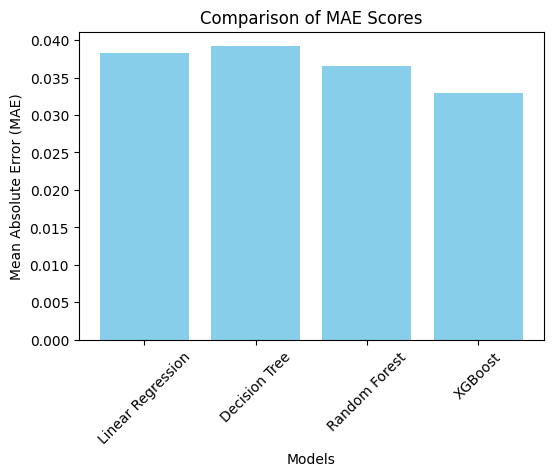

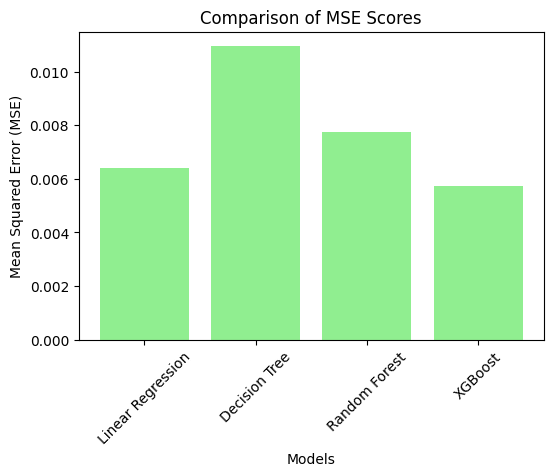

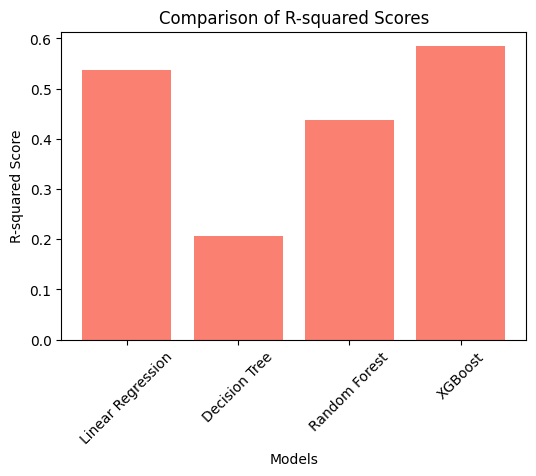

In [31]:

# Evaluate models
models = ['Linear Regression', 'Decision Tree', 'Random Forest', 'XGBoost']
mae_scores, mse_scores, r2_scores = [], [], []

for model, model_name in zip([lr_model, dt_model, rfr_model, xgb_model], models):
    mae, mse, r2, _ = md.evaluate_model(model, X_test, y_test)
    mae_scores.append(mae)
    mse_scores.append(mse)
    r2_scores.append(r2)

# Create a DataFrame to display the results
results_df = pd.DataFrame({
    'Model': models,
    'MSE': mse_scores,
    'R2': r2_scores
})

# Print the results
print(results_df.to_string(index=False, float_format='{:.6f}'.format))
# Plot metrics
md.plot_metrics(models, mae_scores, mse_scores, r2_scores)



#### Interpretation
* .Mean Squared Error (MSE) measures the average squared difference between the predicted values and the actual values. Lower values indicate better model performance because the predictions are closer to the actual values.

* .R2 Score indicates how well the model explains the variability of the response data. An R2 score of 1 means the model perfectly predicts the target, while 0 means the model does no better than a mean-based prediction. Higher values are better.

#### Analysis
* XGBoost has the lowest MSE (0.005731), meaning its predictions are closest to the actual values among the models tested. It also has the highest R2 score (0.584534), indicating it explains the most variability in the data.

* Linear Regression has a higher MSE (0.006393) and a slightly lower R2 score (0.536514) compared to XGBoost.

* Random Forest performs better than Decision Tree but not as well as XGBoost, with an MSE of 0.007746 and an R2 score of 0.438434.

* Decision Tree has the highest MSE (0.010945) and the lowest R2 score (0.206468), indicating it performs the worst among the models tested.

#### Recommendation
XGBoost is the best-performing model based on the provided metrics:

* Lowest MSE: Indicates it has the smallest average prediction error.
* Highest R2 Score: Shows it explains the most variability in the target variable.
* XGBoost’s performance in both MSE and R2 score surpasses the other models, making it the most effective choice for your dataset based on these metrics